**Introduction:**

Document/Text classification is one of the important and typical task in supervised machine learning (ML). Assigning categories to documents, which can be a web page, library book, media articles, gallery etc. has many applications like e.g. spam filtering, email routing, sentiment analysis etc. In this article, I would like to demonstrate how we can do text classification using python, scikit-learn and little bit of NLTK.

In this problem we need to predict author of a particular text based on their writting .As we have labeled dataset for training and need to predict author of a writting then it is the Supervised machine learning(ML).I have atached below 
high level diagram for text classification which is an Supervised learning.


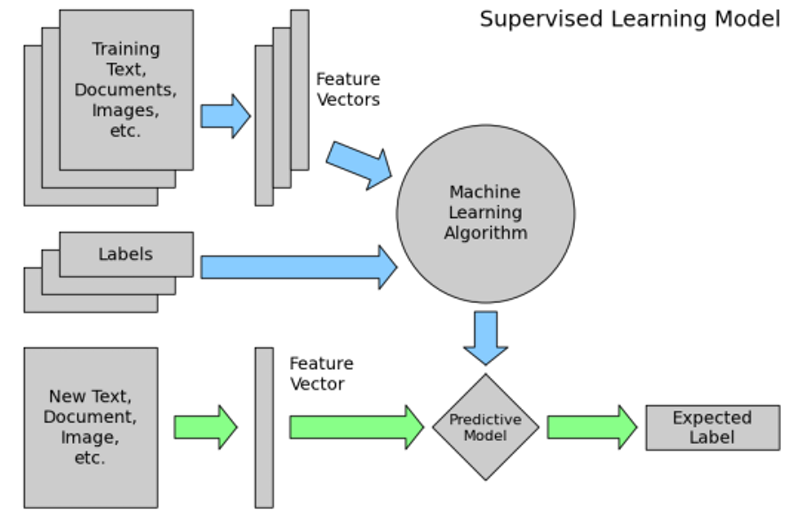

Below are the steps we follow in the notebook.

Exploratory Data Analysis (EDA) and Wordclouds - Analyzing the data by generating simple statistics such word frequencies over the different authors as well as plotting some wordclouds (with image masks).

Natural Language Processing (NLP) with NLTK (Natural Language Toolkit) - Introducing basic text processing methods such as tokenizations, stop word removal, stemming and vectorizing text via term frequencies (TF) as well as the inverse document frequencies (TF-IDF)

Text classification (Using multiple algo and predict the test data)-Introducing step by step text classification using different classifier and predict the test dataset.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [ ]:
#Import python libraries 
import base64
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

*  Load text files to pandas dataframe and check the dataset

In [ ]:
train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")

In [ ]:
train.head(5)

In [ ]:
test.head(5)



Basic data visualization. Here we are using seaborn library to check  which author has written how many articles.  In machine learning modeling this is very much required to get the data insights.


In [ ]:
sns.countplot(train['author'])

In [ ]:
eap = train[train.author=="EAP"]["text"].values
hpl = train[train.author=="HPL"]["text"].values
mws = train[train.author=="MWS"]["text"].values

In [ ]:
dic={'EAP':1,'HPL':2,'MWS':3}
train['author']=train.author.map(dic)

## WordClouds to visualise each author's work

One very handy visualization tool for a data scientist when it comes to any sort of natural language processing is plotting "Word Cloud". A word cloud (as the name suggests) is an image that is made up of a mixture of distinct words which may make up a text or book and where the size of each word is proportional to its word frequency in that text (number of times the word appears). Here instead of dealing with an actual book or text, our words can simply be taken from the column "text"

This kind of visualisation gives us some insight of text data and we can map which author is passonaite about which words.We can use anykind of shape in wordcloud by musking ..but here we are using the simple one.


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

In [ ]:
# The wordcloud of Cthulhu/squidy thing for HP Lovecraft
plt.figure(figsize=(14,11))
wc = WordCloud(background_color="black", max_words=10000, 
                stopwords=STOPWORDS, max_font_size= 25)
wc.generate(" ".join(hpl))
plt.title("HP Lovecraft (Cthulhu-Squidy)", fontsize=16)
plt.imshow(wc.recolor( colormap= 'cubehelix_r' , random_state=17), alpha=0.9)

In [ ]:
plt.figure(figsize=(14,11))
wc = WordCloud(background_color="black", max_words=10000, 
                stopwords=STOPWORDS, max_font_size= 25)
wc.generate(" ".join(eap))
plt.title("EAP - Edgar Allen Poe", fontsize=16)
plt.imshow(wc.recolor( colormap= 'cubehelix_r' , random_state=17), alpha=0.9)

In [ ]:
plt.figure(figsize=(14,11))
wc = WordCloud(background_color="black", max_words=10000, 
                stopwords=STOPWORDS, max_font_size= 25)
wc.generate(" ".join(mws))
plt.title("MWS - Mary Shelley", fontsize=16)
plt.imshow(wc.recolor( colormap= 'cubehelix_r' , random_state=17), alpha=0.9)

# 2. Natural Language Processing 

NLP is a branch of data science that consists of systematic processes for analyzing, understanding, and deriving information from the text data in a smart and efficient manner. By utilizing NLP and its components, one can organize the massive chunks of text data, perform numerous automated tasks and solve a wide range of problems such as – automatic summarization, machine translation, named entity recognition, relationship extraction, sentiment analysis, speech recognition, and topic segmentation etc.Below are the simple steps for text processing

1. **Tokenization** - Tokenization is the process of breaking a stream of textual content up into words, terms, symbols, or some other meaningful elements called tokens. ... The list of tokens turns into input for in additional processing including parsing or text mining.
2. **Stopwords** - Throw away any words that occur too frequently as its frequency of occurrence will not be useful in helping detecting relevant texts. (as an aside also consider throwing away words that occur very infrequently).
3. **Stemming**  - combine variants of words into a single parent word that still conveys the same meaning
4. **Vectorization** - Converting text into vector format. One of the simplest is the famous bag-of-words approach, where you create a matrix (for each document or text in the corpus). In the simplest form, this matrix stores word frequencies (word counts) and is oft referred to as vectorization of the raw text. 




In [ ]:
import nltk

**Tokenization:**

In this process we will breakdown a sentence to a a bag of words or token.This list of takon will be used as feature to train model

In [ ]:
first_text = train.text.values[0]
first_text_list = nltk.word_tokenize(first_text)
print(first_text_list)

 **Stopwords :**
 
 In NLTK library we have in buils stopwords list.We can use this stop words list to remove these words from any text.
 e.g>**The** is the which used very frequent in a text but this is not meaning at all to a words classification or sentiment analysis task. So as a part of data clearing task we need to remove all stop words belore processed.
 

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
first_text_list_cleaned = [word for word in first_text_list if word.lower() not in stopwords]
print(first_text_list_cleaned)
print("="*90)
print("Length of original list: {0} words\n"
      "Length of list after stopwords removal: {1} words"
      .format(len(first_text_list), len(first_text_list_cleaned)))

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['text_without_stopwords'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['text_without_stopwords'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
train.head()

**Stemming:**

Another type of textual noise is about the multiple representations exhibited by single word.

For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”, Though they mean different but contextually all are similar. The step converts all the disparities of a word into their normalized form (also known as lemma). Normalization is a pivotal step for feature engineering with text as it converts the high dimensional features (N different features) to the low dimensional space (1 feature), which is an ideal ask for any ML model.

This process to convert all same meaningful words to a single one is called stemming


In [ ]:
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem("playing"))
print(stemmer.stem("play"))

Creating a new column without stop words.. Going forward we will use this column to all of our modeling

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['text_without_stopwords'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['text_without_stopwords'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
import nltk.stem as stm # Import stem class from nltk
import re
stemmer = stm.PorterStemmer()

# Crazy one-liner code here...
# Explanation above...
train.text_without_stopwords = train.text_without_stopwords.apply(lambda text: " ".join([stemmer.stem(word) for word in text.split(" ")]))
test.text_without_stopwords = test.text_without_stopwords.apply(lambda text: " ".join([stemmer.stem(word) for word in text.split(" ")]))

Here we have created one function for tokenize and stemming .Previously we have defined what do you mean by steaming and tokenization...lets do this now in a single function

In [ ]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

**Extracting features from text files :**

**1.CountVectorizer:**

Text files are actually series of words (ordered). In order to run machine learning algorithms we need to convert the text files into numerical feature vectors. We will be using bag of words model for our example. Briefly, we segment each text file into words (for English splitting by space), and count # of times each word occurs in each document and finally assign each word an integer id. Each unique word in our dictionary will correspond to a feature (descriptive feature).

Scikit-learn has a high level component which will create feature vectors for us ‘CountVectorizer’.
More about it here. 
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

We are creating 2 vector set for test and training data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # Import the library to vectorize the text

# Instantiate the count vectorizer with an NGram Range from 1 to 3 and english for stop words.
count_vect = CountVectorizer(ngram_range=(1,3),stop_words='english')

# Fit the text and transform it into a vector. This will return a sparse matrix.
count_vectorized_train = count_vect.fit_transform(train.text_without_stopwords) #for train data set
count_vectorized_test = count_vect.fit_transform(test.text_without_stopwords) #for test data set

Here we have created one function for tokenize and stemming .Previously we have defined what do you mean by steaming and tokenization...lets do this now in a single function

In [ ]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


**2. TfidfVectorizer:**

Term Frequency – Inverse Document Frequency (TF – IDF)

TF-IDF is a weighted model commonly used for information retrieval problems. It aims to convert the text documents into vector models on the basis of occurrence of words in the documents without taking considering the exact ordering. For Example – let say there is a dataset of N text documents, In any document “D”, TF and IDF will be defined as –

Term Frequency (TF) – TF for a term “t” is defined as the count of a term “t” in a document “D”

Inverse Document Frequency (IDF) – IDF for a term is defined as logarithm of ratio of total documents available in the corpus and number of documents containing the term T.

TF . IDF – TF IDF formula gives the relative importance of a term in a corpus (list of documents), given by the following formula below. Following is the code using python’s scikit learn package to convert a text into tf idf vectors:


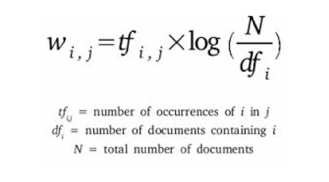



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer # Import the library to vectorize the text
tfidf_vect = TfidfVectorizer(stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem)#We have used this as default model.
#we can tune this to get more accuracy
#tfidf_vect = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
#This two our test and training dataset
tfidf_vectorized_train = tfidf_vect.fit_transform(train.text)
tfidf_vectorized_test = tfidf_vect.fit_transform(test.text)

**Text Classification with Machine Learning Modeling::**

Text classification is one of the classical problem of NLP. Notorious examples include – Email Spam Identification, topic classification of news, sentiment classification and organization of web pages by search engines.

Text classification, in common words is defined as a technique to systematically classify a text object (document or sentence) in one of the fixed category. It is really helpful when the amount of data is too large, especially for organizing, information filtering, and storage purposes.

A typical natural language classifier consists of two parts: (a) Training (b) Prediction as shown in image below. Firstly the text input is processes and features are created. The machine learning models then learn these features and is used for predicting against the new text.

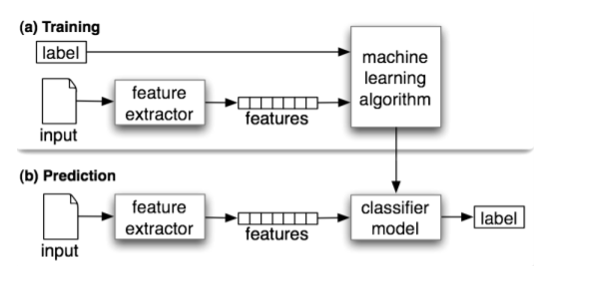

Below are the steps we will follow to comple our task

1.Frist split the train dataset with train and test set .This will be used to train and validate model.

2.Define model and train it with training dataset.

3.Validate the dataset and check the accuracy.

In [ ]:
from sklearn.model_selection import train_test_split # Import the function that makes splitting easier.

# Split the vectorized data. Here we pass the vectorized values and the author column.
# Also, we specify that we want to use a 75% of the data for train, and the rest for test.

###########################
# COUNT VECTORIZED TOKENS #
###########################
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(count_vectorized_train, train.author, train_size=0.75)

###########################
# TFIDF VECTORIZED TOKENS #
###########################
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_vectorized_train, train.author, train_size=0.75)

**Machine Learning Model > Native Bayes**

In [ ]:
# First, import the Multinomial Naive bayes library from sklearn 
from sklearn.naive_bayes import MultinomialNB

# Instantiate the model.
# One for Count Vectorized words
model_count_NB = MultinomialNB()
# One for TfIdf vectorized words
model_tfidf_NB = MultinomialNB()

# Train the model, passing the x values, and the target (y)
model_count_NB.fit(X_train_count, y_train_count)
model_tfidf_NB.fit(X_train_tfidf, y_train_tfidf)

In [ ]:
# Predict the values, using the test features for both vectorized data.
predictions_count = model_count_NB.predict(X_test_count)
predictions_tfidf = model_tfidf_NB.predict(X_test_tfidf)

In [ ]:
# Primero calculamos el accuracy general del modelo
from sklearn.metrics import accuracy_score
accuracy_count = accuracy_score(y_test_count, predictions_count)
accuracy_tfidf = accuracy_score(y_test_tfidf, predictions_tfidf)
print('Count Vectorized Words Accuracy:', accuracy_count)
print('TfIdf Vectorized Words Accuracy:', accuracy_tfidf)

2. Check with another classifier: **KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_count_kmn = KNeighborsClassifier(n_neighbors=10)
model_tfidf_kmn = KNeighborsClassifier(n_neighbors=10)
model_count_kmn.fit(X_train_count, y_train_count)
model_tfidf_kmn.fit(X_train_tfidf, y_train_tfidf)
predictions_count_kmn = model_count_kmn.predict(X_test_count)
predictions_tfidf_kmn = model_tfidf_kmn.predict(X_test_tfidf)
accuracy_count_kmn = accuracy_score(y_test_count, predictions_count_kmn)
accuracy_tfidf_kmn = accuracy_score(y_test_tfidf, predictions_tfidf_kmn)
print('Count Vectorized Words Accuracy:', accuracy_count_kmn)
print('TfIdf Vectorized Words Accuracy:', accuracy_tfidf_kmn)


 Check with another classifier: **RandomForestClassifier**
 
 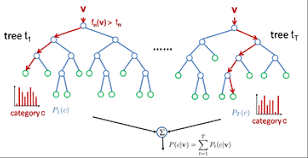

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf_count = RandomForestClassifier()
model_rf_tfidf = RandomForestClassifier()
model_rf_count.fit(X_train_count, y_train_count)
model_rf_tfidf.fit(X_train_tfidf, y_train_tfidf)
predictions_count_rf = model_rf_count.predict(X_test_count)
predictions_tfidf_rf = model_rf_tfidf.predict(X_test_tfidf)
accuracy_count_rf = accuracy_score(y_test_count, predictions_count_rf)
accuracy_tfidf_rf = accuracy_score(y_test_tfidf, predictions_tfidf_rf)
print('Count Vectorized Words Accuracy:', accuracy_count_rf)
print('TfIdf Vectorized Words Accuracy:', accuracy_tfidf_rf)

We have observed that Mative Bayes is outperforming over other modeling lets do some hyperparamet tuning to improve accuracy....

**Lets combile all the code in a single pipe.......**

 **Pipeline :**
 
A pipeline is what chains several steps together, once the initial exploration is done. For example, some codes are meant to transform features — normalise numericals, or turn text into vectors, or fill up missing data, they are transformers; other codes are meant to predict variables by fitting an algorithm, such as random forest or support vector machine or Native bays, they are estimators. Pipeline chains all these together which can then be applied to training data en bloc.

Inshort Pipeline can help to bundle all the code to run serially.

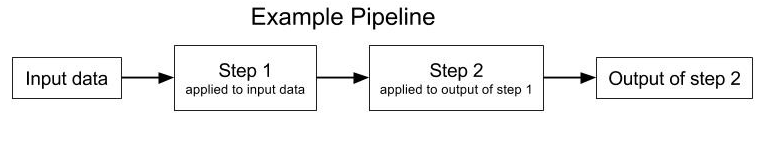



**Hyperparameter tuning :**

Most impotant thing is machine learning is to tune your model perfectly.One classifier or regressor has multiple hyperparameter .To tune it perfectly we can use Gridsearcv function .Where  we can pass mutiple parameter with multiple values and it will identify best parameter for you based on your supplied data.

Here we are using GridSearch CV to optimize the parameters of a classifier(MultinomialNB) in scikit


In [ ]:
from sklearn.grid_search import GridSearchCV  
from time import time  ;
from sklearn.pipeline import Pipeline  

In [ ]:
#test train split once again for pipeline and greadsearch
X_train_gd, X_test_gd, y_train_gd, y_test_gd = train_test_split(train.text_without_stopwords, train.author, train_size=0.75)


In [ ]:
pipeline = Pipeline([('vec', count_vect),('tfidf', TfidfTransformer()),
 ('clf',MultinomialNB())])

In [ ]:
parameters = {  
    'vec__max_df': (0.5, 0.625, 1.0),  
    'vec__max_features': (None, 5000),  
    'vec__min_df': (1, 5, 10),  
    'tfidf__use_idf': (True, False)  
 
    }

In [ ]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2)  
t0 = time()  
grid_search.fit(X_train_gd, y_train_gd)  
print("done in {0}s".format(time() - t0))  
print("Best score: {0}".format(grid_search.best_score_))  
print("Best parameters set:")  
best_parameters = grid_search.best_estimator_.get_params()

In [ ]:
for param_name in sorted(list(parameters.keys())):  
            print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

In [ ]:
#need to create function for all clssifier#
#lgboost and xgboost need to be done
#sumission from best classifier
#ploting accuracy
#Deep learning

**Please keep touch this will be continued with ensemble and deep modeling with different check matrix.. **